In [2]:
import pandas as pd
df = pd.read_csv('data/telecom-churn.csv')
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

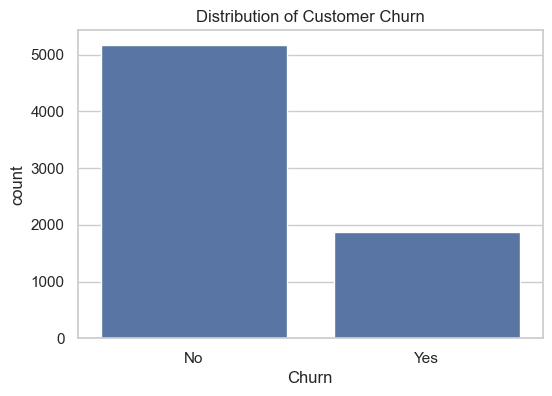

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Churn', data = df)
plt.title('Distribution of Customer Churn')
plt.show()

print(df['Churn'].value_counts(normalize = True))

In [6]:
print(df.isnull().sum())
print(df.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

print("Stage1: Data cleaning completed successfully!")

Missing values in TotalCharges: 0
Stage1: Data cleaning completed successfully!


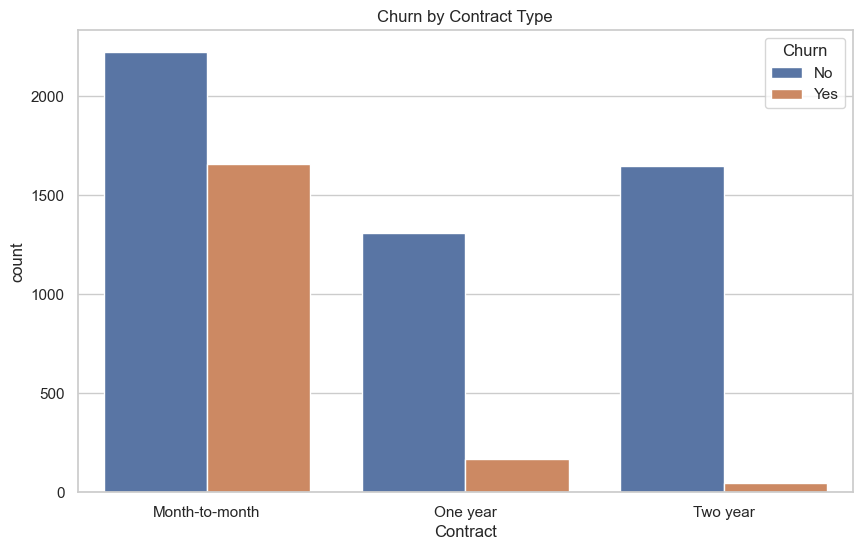

In [9]:
plt.figure(figsize =(10, 6))
sns.countplot(x = 'Contract', hue = 'Churn', data = df)
plt.title('Churn by Contract Type')
plt.show()

In [10]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Initial Observation: Contract type is a key factor affecting churn.

In [11]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(data = df, columns = multi_cols)

print("Encoding finished! All text converted to numbers.")
df.head()
print(df.dtypes)
print(f"Current shape of the data: {df.shape}")

Encoding finished! All text converted to numbers.
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes              